In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [44]:
city_data = os.path.join('city_data.csv')
ride_data = os.path.join('ride_data.csv')

city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

cityridedata = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

cityridedata.head(2)

In [45]:
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

cityridedata = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

cityridedata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


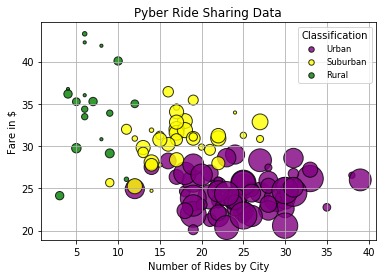

In [55]:
urban_cities = cityridedata[city_ride_data["type"] == "Urban"]
suburban_cities = cityridedata[city_ride_data["type"] == "Suburban"]
rural_cities = cityridedata[city_ride_data["type"] == "Rural"]
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="purple", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Fare in $")
plt.xlabel("Number of Rides by City")
plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Classification", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Show plot
plt.show()

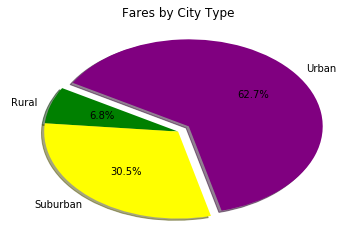

In [60]:
type_percents = 100 * cityridedata.groupby(["type"]).sum()["fare"] / cityridedata["fare"].sum()

plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["green", "yellow", "purple"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("Fares by City Type")

plt.show()

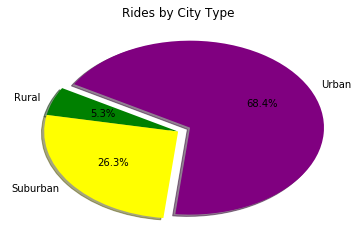

In [61]:
ride_percents = 100 * cityridedata.groupby(["type"]).count()["ride_id"] / cityridedata["ride_id"].count()

plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["green", "yellow", "purple"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("Rides by City Type")

plt.show()

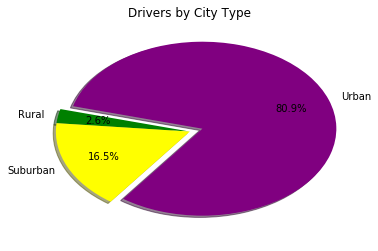

In [65]:
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()

plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["green", "yellow", "purple"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("Drivers by City Type")

plt.show()